#  EDA on Titanic Dataset

In [1]:
import seaborn as sns
import pandas as pd

# Loading the Titanic dataset
titanic = sns.load_dataset('titanic')


Analyzing the Data

In [2]:
print(titanic.head())


print(titanic.describe(include='all'))


print(titanic.isnull().sum())


print(titanic.columns)


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN       

Feature Engineering

In [3]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1


titanic['is_alone'] = (titanic['family_size'] == 1).astype(int)


titanic['age_band'] = pd.cut(titanic['age'], 5)


titanic['fare_band'] = pd.qcut(titanic['fare'], 4)


In [4]:
categorical_columns = ['sex', 'embarked', 'class', 'who', 'embark_town', 'alive', 'adult_male', 'alone']
existing_columns = [col for col in categorical_columns if col in titanic.columns]


titanic = pd.get_dummies(titanic, columns=existing_columns, drop_first=True)


Data Cleaning

In [5]:
print(titanic.columns)


titanic['age'].fillna(titanic['age'].median(), inplace=True)


if 'embarked' in titanic.columns:
    titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)


if 'deck' in titanic.columns:
    titanic.drop(columns=['deck'], inplace=True)


if 'embark_town' in titanic.columns:
    titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)


print(titanic.isnull().sum())


Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'deck',
       'family_size', 'is_alone', 'age_band', 'fare_band', 'sex_male',
       'embarked_Q', 'embarked_S', 'class_Second', 'class_Third', 'who_man',
       'who_woman', 'embark_town_Queenstown', 'embark_town_Southampton',
       'alive_yes', 'adult_male_True', 'alone_True'],
      dtype='object')
survived                     0
pclass                       0
age                          0
sibsp                        0
parch                        0
fare                         0
family_size                  0
is_alone                     0
age_band                   177
fare_band                    0
sex_male                     0
embarked_Q                   0
embarked_S                   0
class_Second                 0
class_Third                  0
who_man                      0
who_woman                    0
embark_town_Queenstown       0
embark_town_Southampton      0
alive_yes                    0
adult_male_Tr

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8308\1706585365.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


Exploratory Data Analysis (EDA)

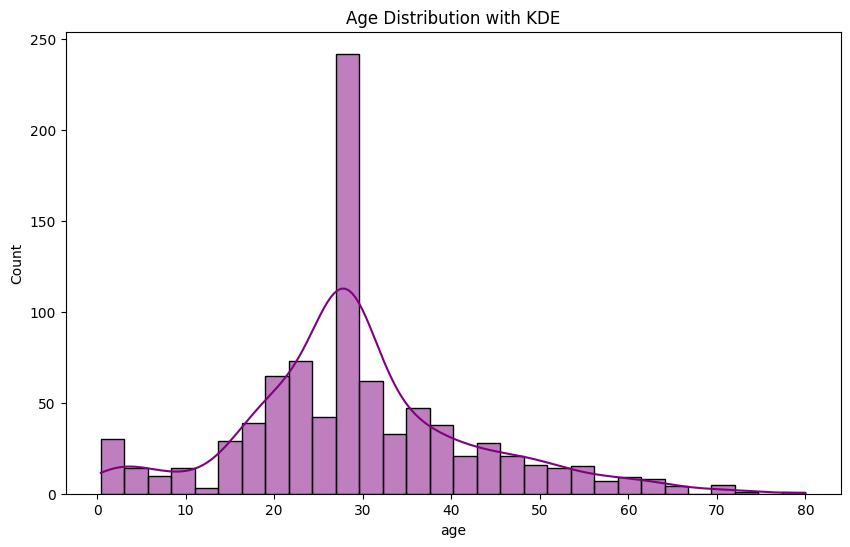

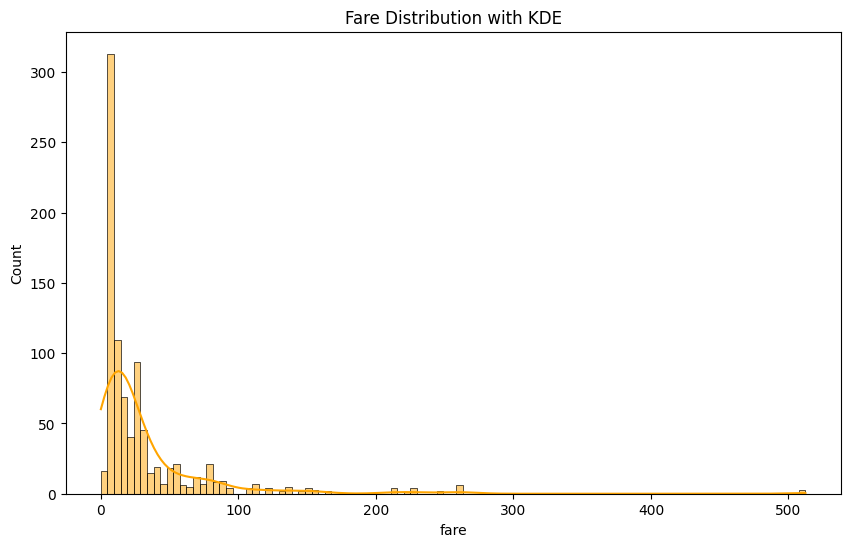

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8308\537012870.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic, x='sex_male', palette='viridis')


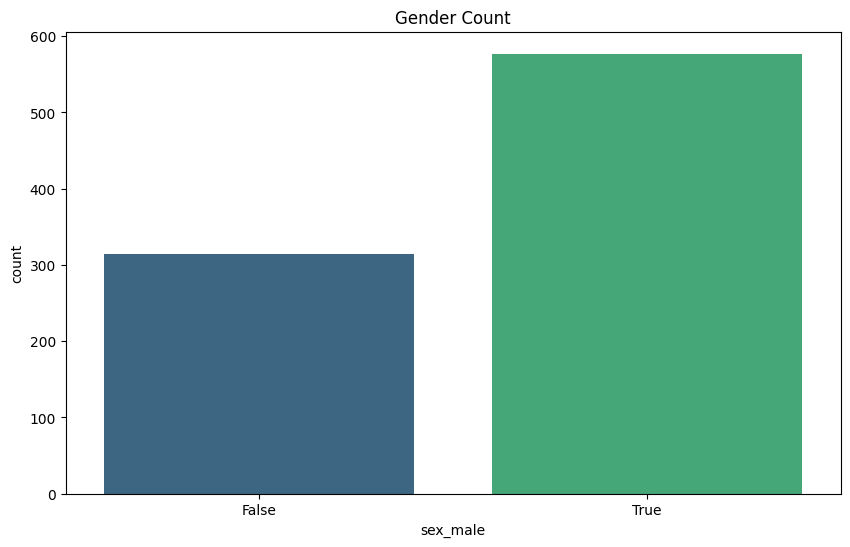

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8308\537012870.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic, x='class_Second', palette='viridis')


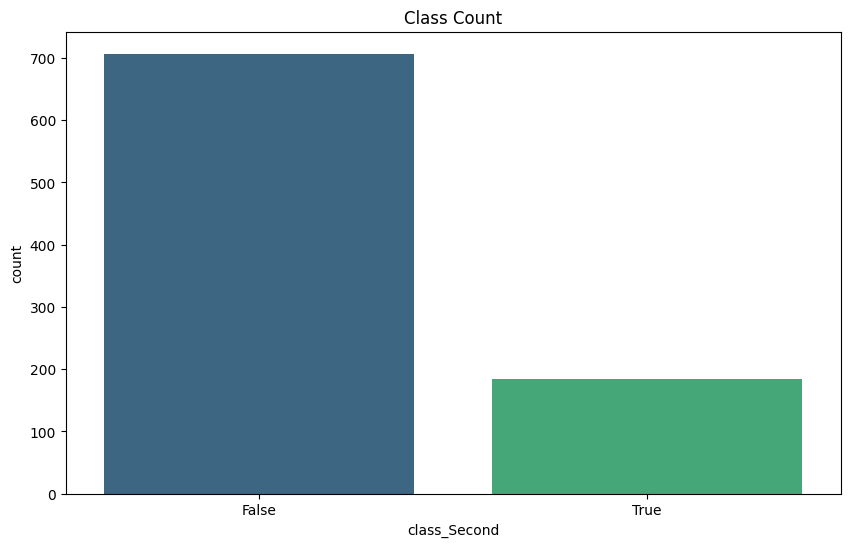

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(titanic['age'], kde=True, color='purple')
plt.title('Age Distribution with KDE')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(titanic['fare'], kde=True, color='orange')
plt.title('Fare Distribution with KDE')
plt.show()

# Count of categorical features
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic, x='sex_male', palette='viridis')
plt.title('Gender Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=titanic, x='class_Second', palette='viridis')
plt.title('Class Count')
plt.show()


EDA Bivariate Analysis with Advanced Visualizations

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8308\29543391.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex_male', y='survived', data=titanic, palette='coolwarm')


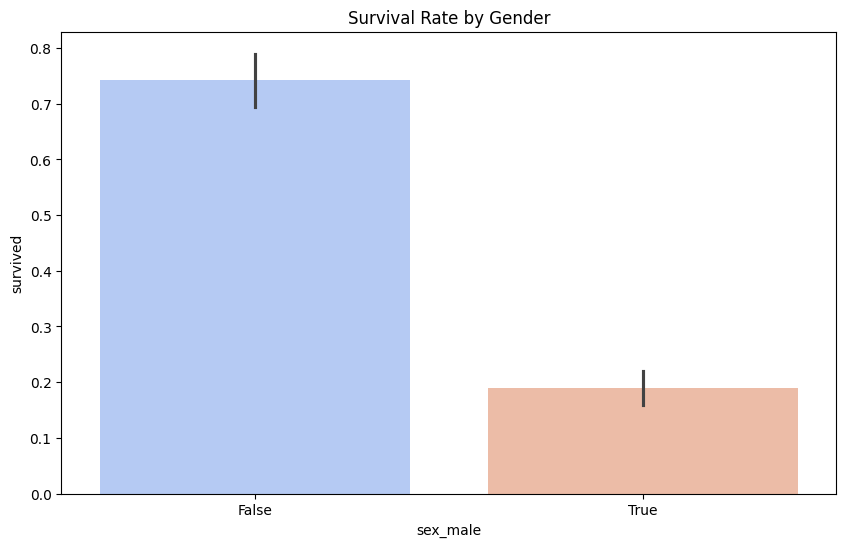

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8308\29543391.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='class_Second', y='survived', data=titanic, palette='coolwarm')


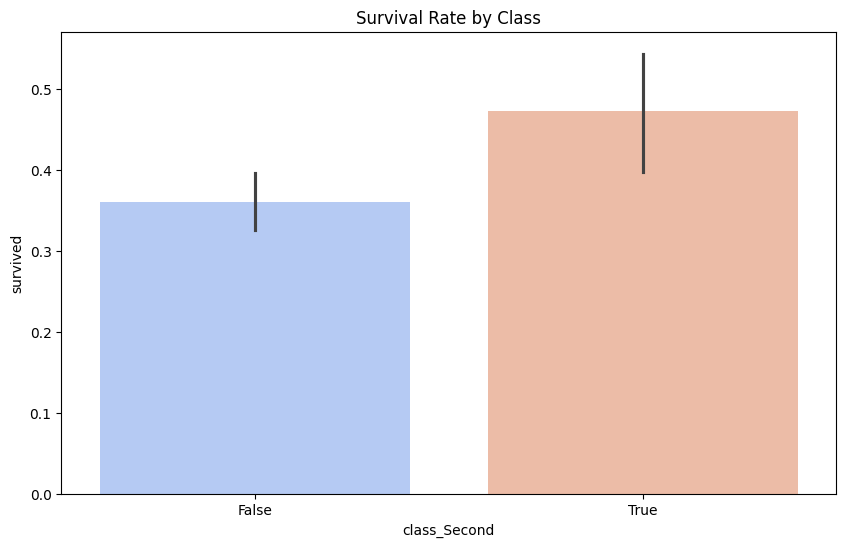

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8308\29543391.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='class_Third', y='survived', data=titanic, palette='coolwarm')


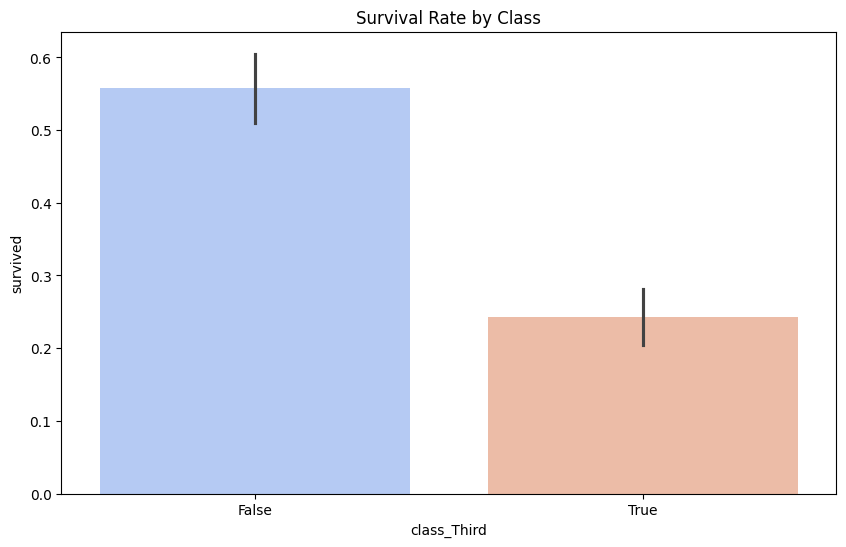

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8308\29543391.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='survived', y='age', data=titanic, palette='magma')


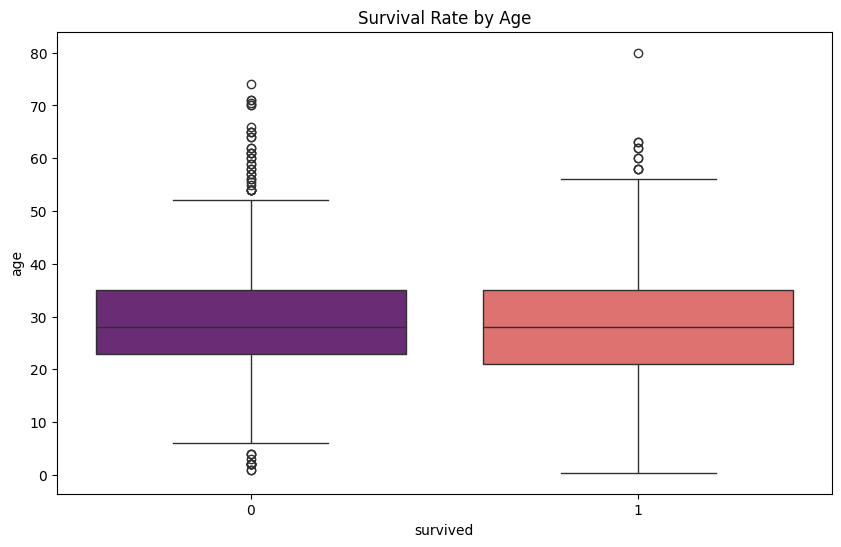

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x='sex_male', y='survived', data=titanic, palette='coolwarm')
plt.title('Survival Rate by Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='class_Second', y='survived', data=titanic, palette='coolwarm')
plt.title('Survival Rate by Class')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='class_Third', y='survived', data=titanic, palette='coolwarm')
plt.title('Survival Rate by Class')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='survived', y='age', data=titanic, palette='magma')
plt.title('Survival Rate by Age')
plt.show()


EDA Multivariate Analysis with Advanced Visualizations

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\L

<Figure size 1500x1000 with 0 Axes>

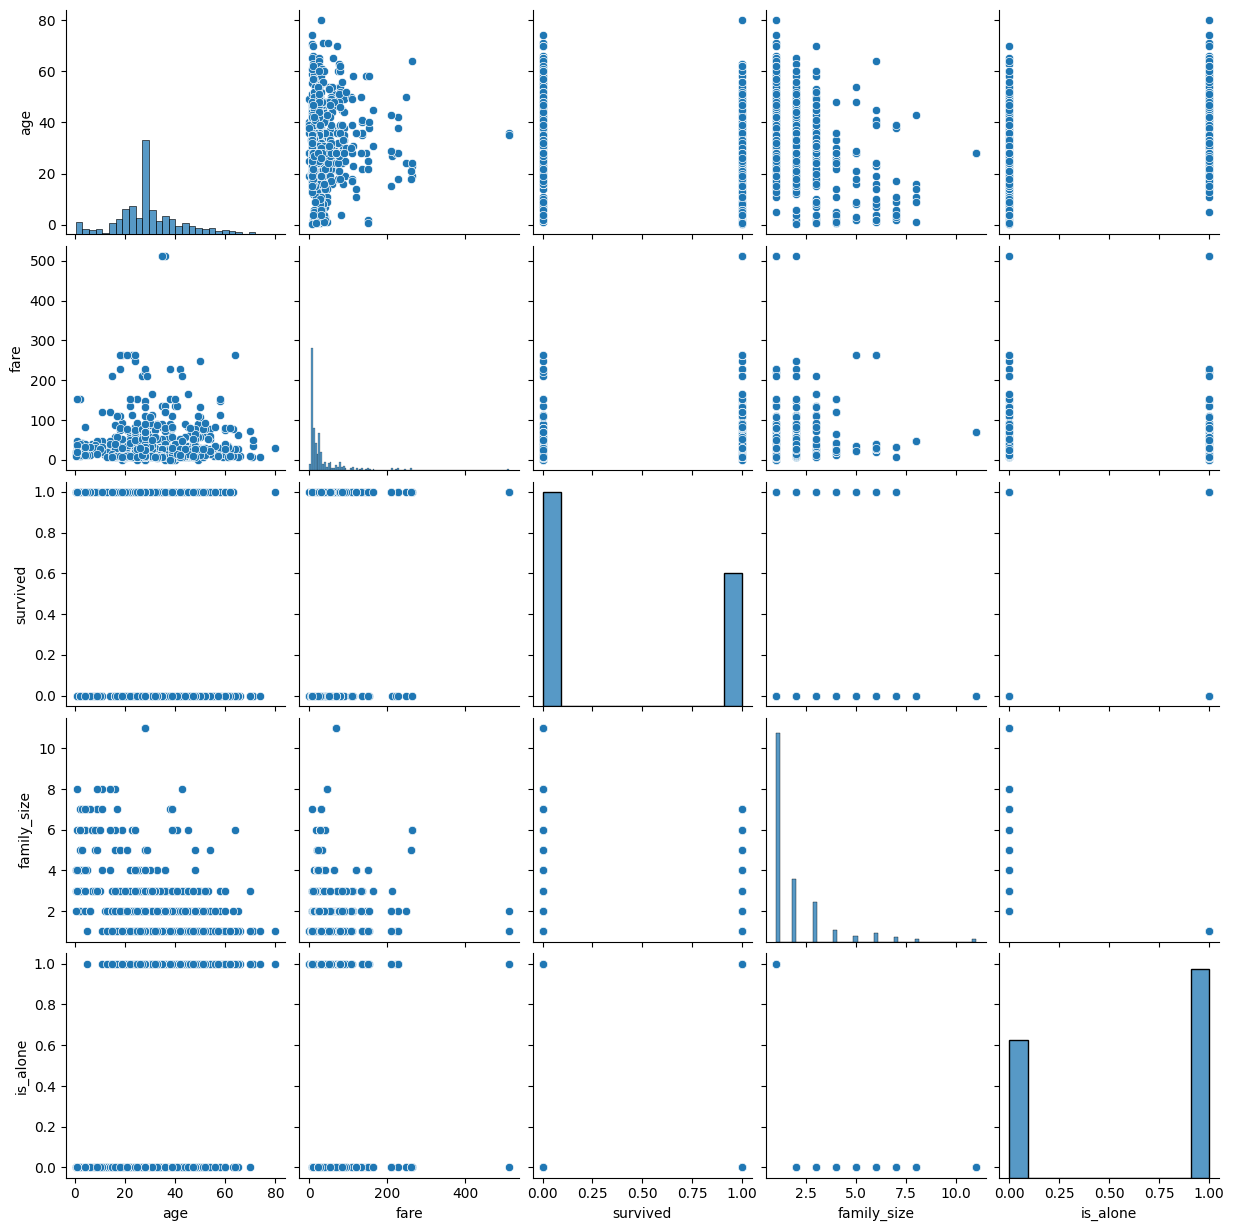

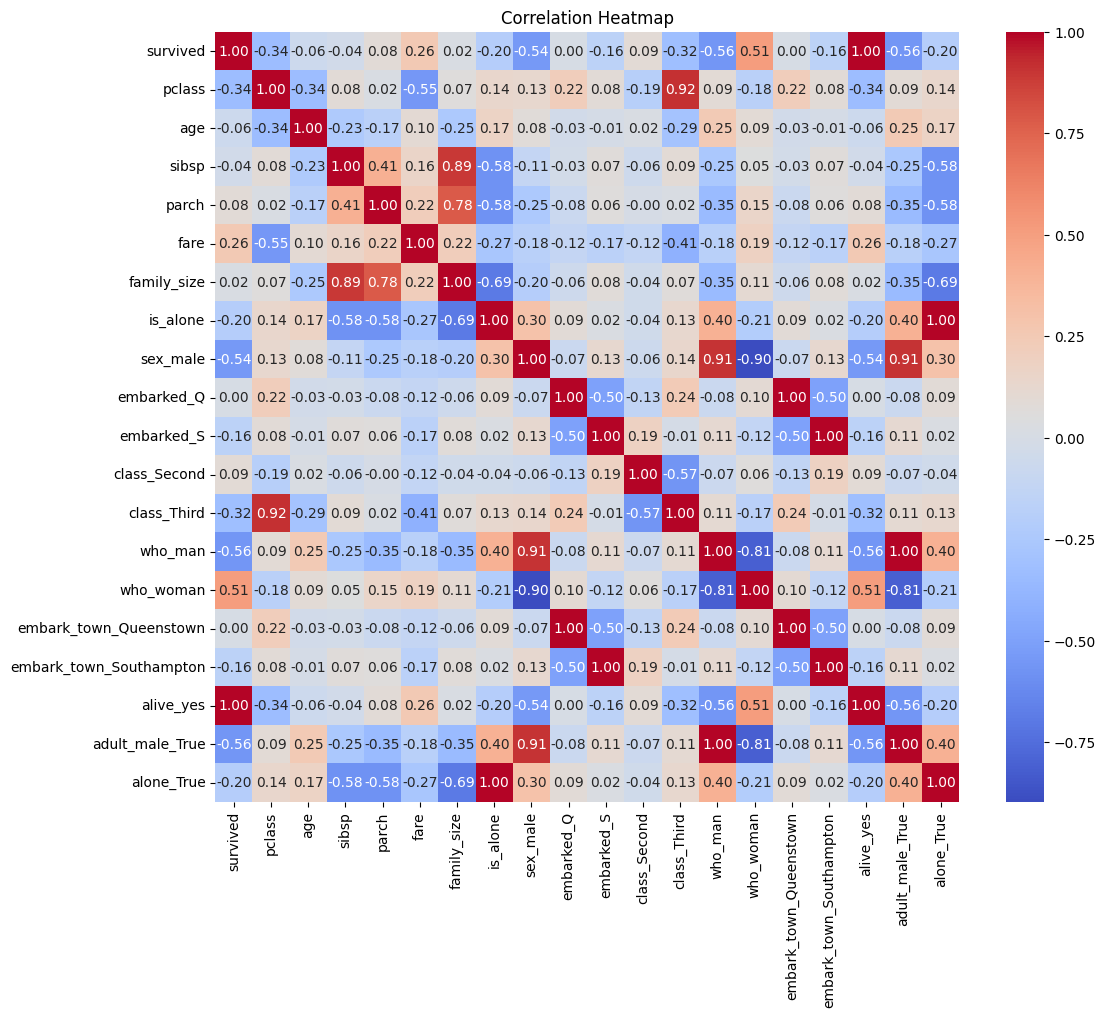

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8308\174308501.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='survived', y='age', data=titanic, palette='Set2')


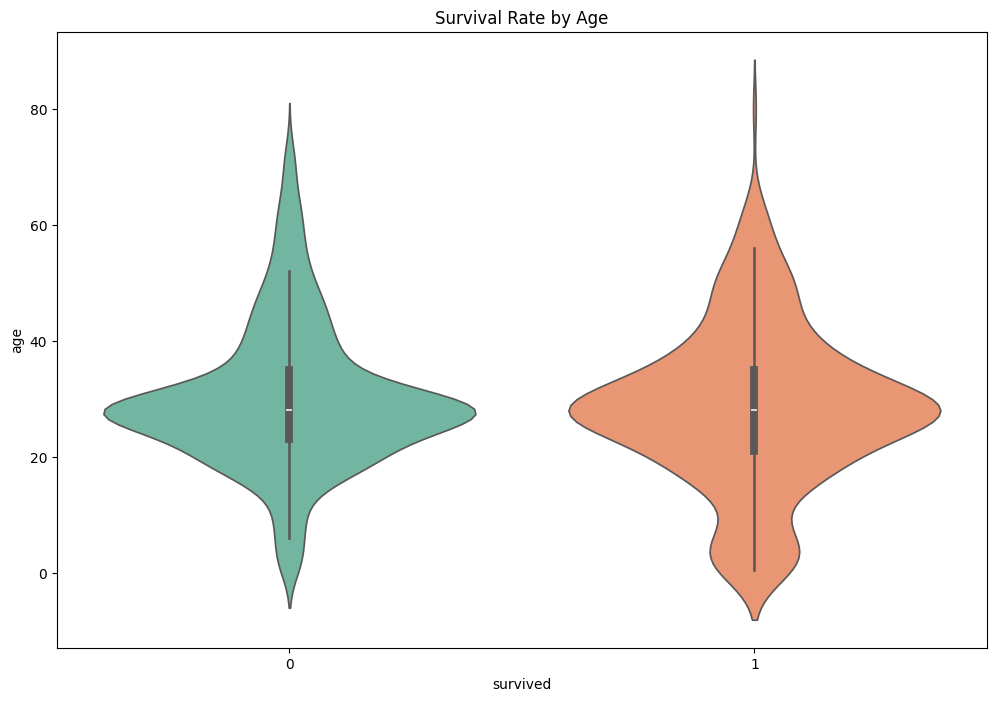

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 17.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


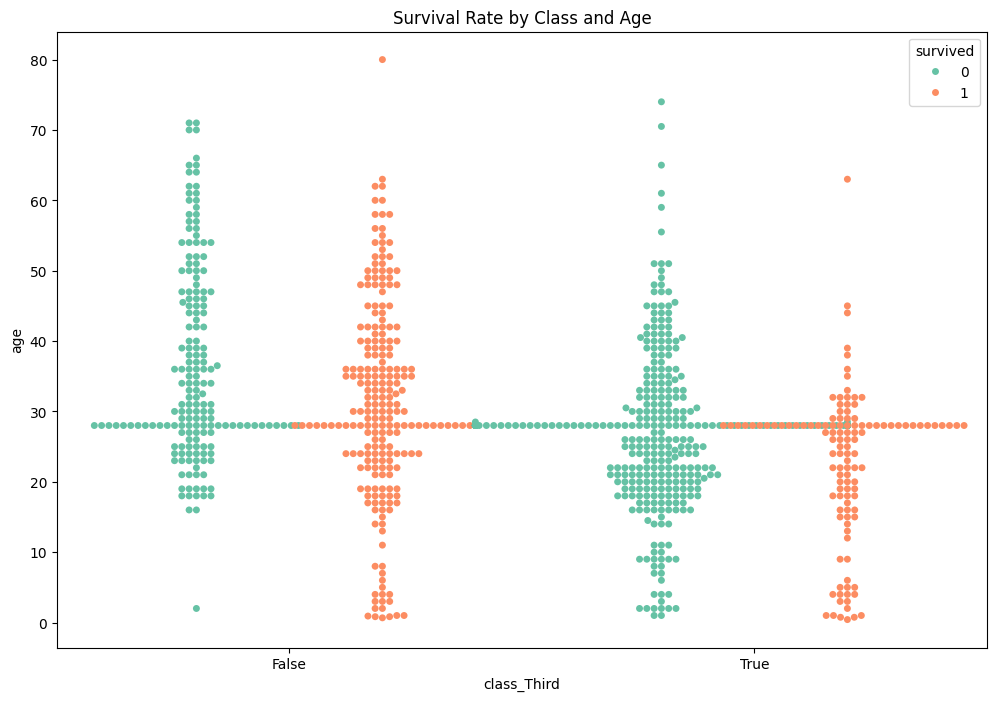

In [8]:
interval_columns = ['age_band', 'fare_band']
titanic_corr = titanic.drop(columns=interval_columns)


plt.figure(figsize=(15, 10))
sns.pairplot(titanic_corr[['age', 'fare', 'survived', 'family_size', 'is_alone']], palette='husl')
plt.show()


plt.figure(figsize=(12, 10))
sns.heatmap(titanic_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


plt.figure(figsize=(12, 8))
sns.violinplot(x='survived', y='age', data=titanic, palette='Set2')
plt.title('Survival Rate by Age')
plt.show()


plt.figure(figsize=(12, 8))
sns.swarmplot(x='class_Third', y='age', hue='survived', data=titanic, dodge=True, palette='Set2')
plt.title('Survival Rate by Class and Age')
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8308\3791793176.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='family_size', y='survived', data=titanic, palette='pastel')


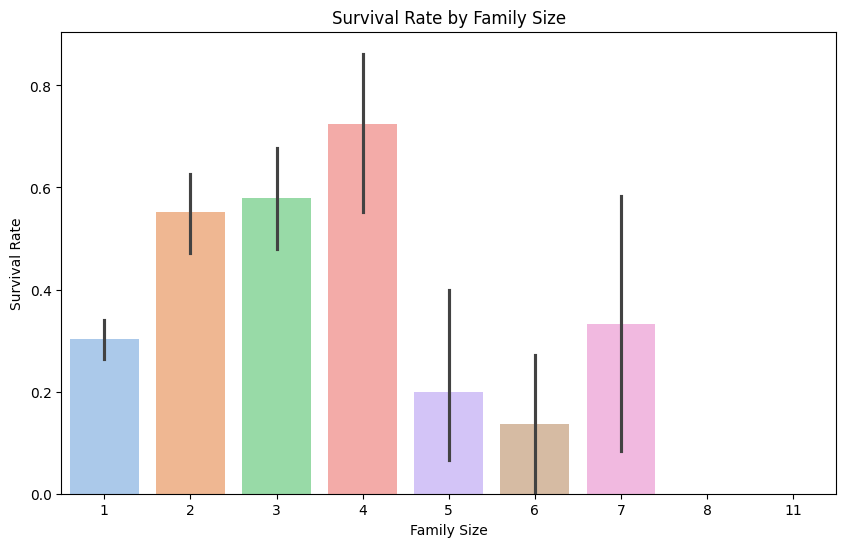

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8308\3791793176.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_alone', y='survived', data=titanic, palette='pastel')


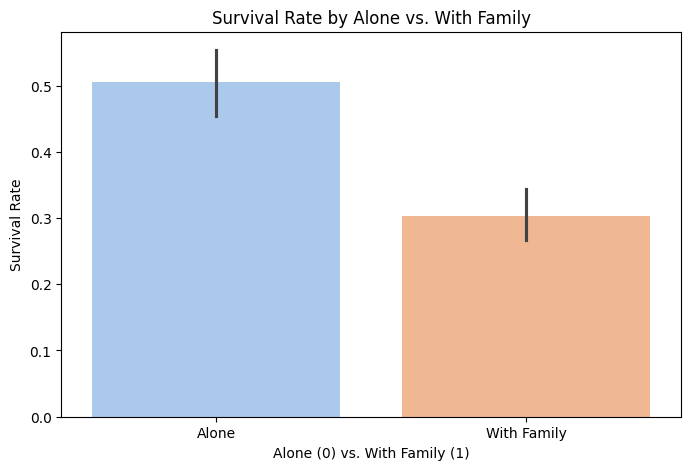

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x='family_size', y='survived', data=titanic, palette='pastel')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()


plt.figure(figsize=(8, 5))
sns.barplot(x='is_alone', y='survived', data=titanic, palette='pastel')
plt.title('Survival Rate by Alone vs. With Family')
plt.xlabel('Alone (0) vs. With Family (1)')
plt.ylabel('Survival Rate')
plt.xticks([0, 1], ['Alone', 'With Family'])
plt.show()
